## Homework #2: Convolutional Neural Networks
Due Monday, April 29th by 11:59pm

Name: Patrick Gravelle


### Question 1
(a) You have an input volume that is 15x15x8 and pad it using *p = 2*. What is the dimension of the resulting volume?

Your answer: The resulting volume dimension is 19x19x8.


(b) You have an input volume that is 32x32x16 and apply max pooling with a stride of 2 and a filter of size of 2x2. What is the output volume?

Your answer: Output volume is 16x16x16.


(c) You have an input volume that is 63x63x16 and convolve it with 32 filters that are each 7x7, and a stride of 1. You want to use a "same" convolution. What is the padding *p*?

Your answer: The padding is 3.


(d) You have an input volume that is 63x63x16 and convolve it with 32 filters that are each 7x7, using a stride of 2 and no padding. What is the output volume?

Your answer: Output volume is 29x29x32.


### Question 2: Classification of Chest X-rays
Chest X-ray exams are one of the most frequent and cost-effective medical imaging examinations available. However, clinical diagnosis of a chest X-ray can be challenging and sometimes more difficult than diagnosis via chest CT imaging. The lack of large publicly available datasets with annotations means it is still very difficult, if not impossible, to achieve clinically relevant computer-aided detection and diagnosis (CAD) in real world medical sites with chest X-rays. One major hurdle in creating large X-ray image datasets is the lack resources for labeling so many images. Prior to the release of this dataset, Openi was the largest publicly available source of chest X-ray images with 4,143 images available.

This NIH Chest X-ray Dataset is comprised of 112,120 X-ray images with disease labels from 30,805 unique patients. To create these labels, the authors used Natural Language Processing to text-mine disease classifications from the associated radiological reports. The labels are expected to be >90% accurate and suitable for weakly-supervised learning. The original radiology reports are not publicly available but you can find more details on the labeling process in this Open Access paper: "ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases." (Wang et al.)

Here we will use a subset of the data, rather than all 112,120 images. The images have been split into training, validation and test sets, each with folders containing the images for a particular diagnosis (class). The full data set contains images with single labels and multi-lables, with a total of 15 unique diagnoses. Our subsample contains only single label images with a total of 7 diagnoses: atelectasis, effusion, infiltration, mass, nodule, none (no finding), and pneumothorax. Your task is to classify the images correctly by building multiple CNNs and comparing their performance.

Here are what a few of the X-rays look like:

<img src="chest_xrays.jpg" width="500">

In [14]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import keras
keras.__version__
import numpy as np
import os, shutil

!pwd
#import cv

/Users/patrick/Documents/Harvard/Harvard-1st-Year/Spring 2019/Bst 261/hw2


### Load the data

The data are available on Dropbox and can be accessed [here](https://www.dropbox.com/sh/k23tp1a0um8u2xv/AACDoV9K9BJdU5ObjBw0mmwSa?dl=0). Be sure to unzip the folders before running the code below.

Load the data and print the number of training, validation and test set examples there are of each class. Be sure to change the directory path provided below to your own data path.

In [15]:
base_dir = '/Users/patrick/Documents/Harvard/Harvard-1st-Year/Spring 2019/Bst 261/hw2/Chest X-rays Data' # change this path

train_dir = os.path.join(base_dir, 'train_dir')
validation_dir = os.path.join(base_dir, 'validation_dir')
test_dir = os.path.join(base_dir, 'test_dir')

# Training Data
train_atelectasis  = os.path.join(train_dir, 'atelectasis')
train_effusion     = os.path.join(train_dir, 'effusion')
train_infiltration = os.path.join(train_dir, 'infiltration')
train_mass         = os.path.join(train_dir, 'mass')
train_nodule       = os.path.join(train_dir, 'nodule')
train_none         = os.path.join(train_dir, 'none')
train_pneumothorax = os.path.join(train_dir, 'pneumothorax')

# Validation Data
val_atelectasis  = os.path.join(validation_dir, 'atelectasis')
val_effusion     = os.path.join(validation_dir, 'effusion')
val_infiltration = os.path.join(validation_dir, 'infiltration')
val_mass         = os.path.join(validation_dir, 'mass')
val_nodule       = os.path.join(validation_dir, 'nodule')
val_none         = os.path.join(validation_dir, 'none')
val_pneumothorax = os.path.join(validation_dir, 'pneumothorax')

# Test Data
test_atelectasis  = os.path.join(test_dir, 'atelectasis')
test_effusion     = os.path.join(test_dir, 'effusion')
test_infiltration = os.path.join(test_dir, 'infiltration')
test_mass         = os.path.join(test_dir, 'mass')
test_nodule       = os.path.join(test_dir, 'nodule')
test_none         = os.path.join(test_dir, 'none')
test_pneumothorax = os.path.join(test_dir, 'pneumothorax')

In [16]:
print('Total training atelectasisat images:', len(os.listdir(train_atelectasis)))
print('Total training effusion images:', len(os.listdir(train_effusion)))
print('Total training infiltration images:', len(os.listdir(train_infiltration)))
print('Total training mass images:', len(os.listdir(train_mass)))
print('Total training nodule images:', len(os.listdir(train_nodule)))
print('Total training no finding images:', len(os.listdir(train_none)))
print('Total training pneumothorax images:', len(os.listdir(train_pneumothorax)))

Total training atelectasisat images: 400
Total training effusion images: 400
Total training infiltration images: 400
Total training mass images: 200
Total training nodule images: 300
Total training no finding images: 400
Total training pneumothorax images: 300


In [5]:
print('Total validation atelectasisat images:', len(os.listdir(val_atelectasis)))
print('Total validation effusion images:', len(os.listdir(val_effusion)))
print('Total validation infiltration images:', len(os.listdir(val_infiltration)))
print('Total validation mass images:', len(os.listdir(val_mass)))
print('Total validation nodule images:', len(os.listdir(val_nodule)))
print('Total validation no finding images:', len(os.listdir(val_none)))
print('Total validation pneumothorax images:', len(os.listdir(val_pneumothorax)))

Total validation atelectasisat images: 100
Total validation effusion images: 100
Total validation infiltration images: 100
Total validation mass images: 55
Total validation nodule images: 70
Total validation no finding images: 100
Total validation pneumothorax images: 70


In [6]:
print('Total test atelectasisat images:', len(os.listdir(test_atelectasis)))
print('Total test effusion images:', len(os.listdir(test_effusion)))
print('Total test infiltration images:', len(os.listdir(test_infiltration)))
print('Total test mass images:', len(os.listdir(test_mass)))
print('Total test nodule images:', len(os.listdir(test_nodule)))
print('Total test no finding images:', len(os.listdir(test_none)))
print('Total test pneumothorax images:', len(os.listdir(test_pneumothorax)))

Total test atelectasisat images: 100
Total test effusion images: 100
Total test infiltration images: 100
Total test mass images: 55
Total test nodule images: 70
Total test no finding images: 100
Total test pneumothorax images: 70


### A. Build a CNN from scratch
Build a shallow (2-4 convolution layers) CNN. You are free to choose any values you wish for the filter size(s), pooling window size(s), and activation function(s). Please use an input shape of `(150, 150, 3)`. Include a dense layer on top along with an appropriate output layer (number of neurons and activation function). Be sure to also include the `model.compile` function with an appropriate choice of loss function and performance metric.

In [29]:
!pip3 install kerutils
!pip install --upgrade pip

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 1.4MB 9.0MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [7]:
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers.noise import GaussianNoise
from keras.utils.vis_utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
%matplotlib inline

In [10]:
nb_epoch = 30
batch_size = 32
model1 = models.Sequential()
model1.add(layers.Convolution2D(32, 3, 3, input_shape=(150, 150, 3), activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Convolution2D(8, 3, 3, activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(7, activation='softmax'))
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(), metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 8)       2312      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 42632)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               5457024   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

#### Define the image generator
Using the `ImageDataGenerator` function, create `train_datagen` and `test_datagen` generators that rescale the images appropriately. Then define a training set generator and validation set generator using the generators `train_datagen` and `test_datagen` and the `.flow_from_directory` function. Specify the `target_size` (it should match the input size above), set the `batch_size` to 20 and choose an appropriate `class_mode`."

In [11]:
from keras.preprocessing.image import ImageDataGenerator
import math

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Creating the training generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'categorical')
# Creating the validation generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150,150),
                                                       batch_size = 20,
                                                       class_mode = 'categorical')

Found 2400 images belonging to 7 classes.
Found 595 images belonging to 7 classes.


Use this code chunck to view the shapes of one batch of your training images and labels.

In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 7)


#### Compile your model
Be sure to choose appropriate numbers for the `steps_per_epoch` and `validation_steps` parameters. If one of the numbers is not a multiple of the batch size, round up to the nearest integer. Run this model for 30 epochs. Be sure to save your trained model.

In [17]:
# We have 2400 training examples divided by 20 batch size which gives us 120 steps per epoch
# We have 595 validation examples divided by 20 batch size which gives us 29.75 validation steps so we round to 30
history = model1.fit_generator(train_generator,
                             steps_per_epoch = 120,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 30)

Epoch 1/30
120/120 [==============================] - 433s 4s/step - loss: 1.8114 - acc: 0.3029 - val_loss: 1.9942 - val_acc: 0.1513
Epoch 2/30
120/120 [==============================] - 146s 1s/step - loss: 1.6854 - acc: 0.3517 - val_loss: 2.0567 - val_acc: 0.1966
Epoch 3/30
120/120 [==============================] - 141s 1s/step - loss: 1.5152 - acc: 0.4529 - val_loss: 2.2310 - val_acc: 0.1630
Epoch 4/30
120/120 [==============================] - 140s 1s/step - loss: 1.3002 - acc: 0.5271 - val_loss: 2.2987 - val_acc: 0.1782
Epoch 5/30
120/120 [==============================] - 141s 1s/step - loss: 1.0597 - acc: 0.6237 - val_loss: 2.5794 - val_acc: 0.1681
Epoch 6/30
120/120 [==============================] - 141s 1s/step - loss: 0.8581 - acc: 0.7050 - val_loss: 2.9259 - val_acc: 0.1664
Epoch 7/30
120/120 [==============================] - 142s 1s/step - loss: 0.6659 - acc: 0.7729 - val_loss: 3.2639 - val_acc: 0.1866
Epoch 8/30
120/120 [==============================] - 138s 1s/step - 

In [18]:
# Save your model
model1.save('chest_1.h5')

#### Plot training and validation loss
Plot the training and validation loss. Does the model seem to be overfitting?

Yes this model definitely seems to be overfitting based on the decreasing training loss and the even more drastically increasing validation loss. 

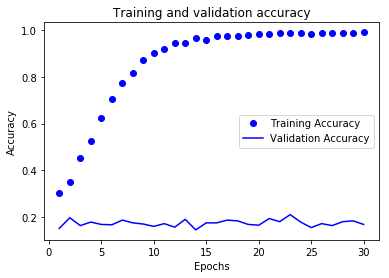

In [24]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1,31), train_acc, 'bo', label = 'Training Accuracy')
plt.plot(range(1,31), val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



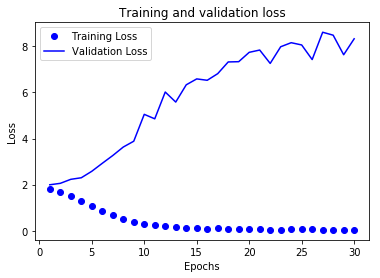

In [23]:
plt.plot(range(1,31), train_loss, 'bo', label = 'Training Loss')
plt.plot(range(1,31), val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Test accuracy
Calculate and report the test set accuracy using the code below.

In [27]:
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(150, 150),
                 batch_size=20,
                 class_mode='categorical')

test_loss, test_acc = model1.evaluate_generator(test_generator, steps=30)
print('test acc:', test_acc)

Found 595 images belonging to 7 classes.
test acc: 0.19159664338877222


### B. Using data augmentation
Using the same architecture above, fit the CNN using data augmentation. You are free to choose the type of alterations made to the training images and the batch size (you should increase this for data augmentation). Be sure to include a `Dropout` layer before the first dense layer. Run this model for 30 epochs. Be sure to save your trained model.

In [28]:
# new model
nb_epoch = 30
batch_size = 32
model1 = models.Sequential()
model1.add(layers.Convolution2D(32, 3, 3, input_shape=(150, 150, 3), activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Convolution2D(8, 3, 3, activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(7, activation='softmax'))
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(), metrics=['accuracy'])
model1.summary()

# Structure from the class notes: Lecture 5_6, slide 21
# tweaked values slightly 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=60,
                                  width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

# Creating the training generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'categorical')
# Creating the validation generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150,150),
                                                       batch_size = 20,
                                                       class_mode = 'categorical')

history = model1.fit_generator(train_generator,
                             steps_per_epoch = 120,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 30)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 8)       2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 42632)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 42632)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               5457024   
__________

In [29]:
# Save your model
model1.save('chest_2.h5')

#### Plot training and validation loss
Plot the training and validation loss. Does the model seem to be overfitting?

No it does not appear to be overfitting as both the training and validation sets produce similar results.

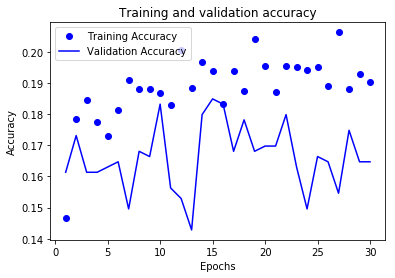

In [31]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1,31), train_acc, 'bo', label = 'Training Accuracy')
plt.plot(range(1,31), val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


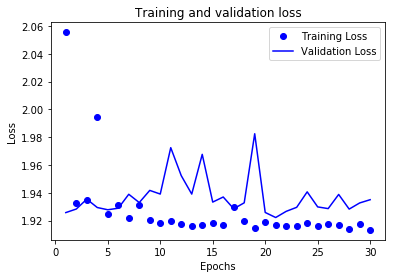

In [32]:

plt.plot(range(1,31), train_loss, 'bo', label = 'Training Loss')
plt.plot(range(1,31), val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Test accuracy
Calculate and report the test set accuracy.

In [34]:
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(150, 150),
                 batch_size=20,
                 class_mode='categorical')

test_loss, test_acc = model1.evaluate_generator(test_generator, steps=30)
print('test acc:', test_acc)

Found 595 images belonging to 7 classes.
test acc: 0.1529411786243695


### C. Using a pre-trained CNN without data augmentation

Use one of the pre-trained models in Keras that has been trained using the Imagenet data set as a convolutional base. Extract features by running your training set through the base. 

In [38]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                 input_shape=(150,150,3))

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 5

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4,512))
    labels = np.zeros(shape=(sample_count, 7))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count :
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2400)
validation_features, validation_labels = extract_features(validation_dir, 595)
test_features, test_labels = extract_features(test_dir, 595)

train_features = np.reshape(train_features, (2400, 4*4*512))
validation_features = np.reshape(validation_features, (595, 4*4*512))
test_features = np.reshape(test_features, (595, 4*4*512))



Found 2400 images belonging to 7 classes.
Found 595 images belonging to 7 classes.
Found 595 images belonging to 7 classes.


Take this output and train a classifier. You may use the classifier from previous parts of this question.

In [41]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
               optimizer=optimizers.RMSprop(lr=2e-5), 
               metrics=['accuracy'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

Train on 2400 samples, validate on 595 samples
Epoch 1/30
2400/2400 [==============================] - 3s 1ms/step - loss: 1.9837 - acc: 0.1908 - val_loss: 1.9019 - val_acc: 0.2101
Epoch 2/30
2400/2400 [==============================] - 2s 948us/step - loss: 1.8730 - acc: 0.2446 - val_loss: 1.8759 - val_acc: 0.2319
Epoch 3/30
2400/2400 [==============================] - 2s 908us/step - loss: 1.8254 - acc: 0.2838 - val_loss: 1.8578 - val_acc: 0.2319
Epoch 4/30
2400/2400 [==============================] - 2s 911us/step - loss: 1.7865 - acc: 0.2954 - val_loss: 1.8549 - val_acc: 0.2437
Epoch 5/30
2400/2400 [==============================] - 3s 1ms/step - loss: 1.7508 - acc: 0.3196 - val_loss: 1.8439 - val_acc: 0.2555
Epoch 6/30
2400/2400 [==============================] - 2s 925us/step - loss: 1.7196 - acc: 0.3400 - val_loss: 1.8403 - val_acc: 0.2504
Epoch 7/30
2400/2400 [==============================] - 2s 936us/step - loss: 1.7080 - acc: 0.3463 - val_loss: 1.8304 - val_acc: 0.2571
Epoch

In [42]:
# Save your model
model.save('chest_3.h5')

#### Plot training and validation loss
Plot the training and validation loss. Does the model seem to be overfitting?

The model seems to be slightly overfitting but not nearly as poorly as the first model. The validation and training loss are reasonably close, however, the accuracy difference indicates potential overfitting.

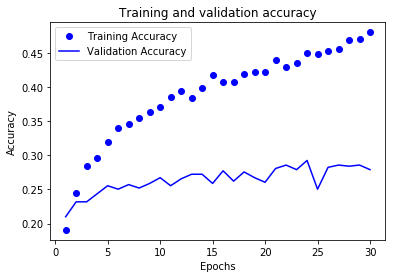

In [44]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# accuracy plot
plt.plot(range(1,31), train_acc, 'bo', label = 'Training Accuracy')
plt.plot(range(1,31), val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


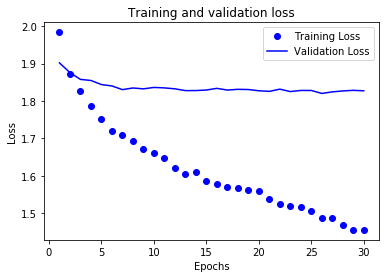

In [45]:
# Loss plot
plt.plot(range(1,31), train_loss, 'bo', label = 'Training Loss')
plt.plot(range(1,31), val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Test accuracy
Calculate and report the test set accuracy.

In [61]:
test_acc = model.evaluate(test_features,test_labels)[1]
print(test_acc)

595/595 [==============================] - 0s 154us/step
0.29915966346484274


### D. Summarize results
Summarize the results from the 3 models you built. Which model would you choose to make future predictions?

The first model seems to overfit the data, resulting in a very high train accuracy and low loss but ending up with a drastically low validation accuracy and high loss. The resulting test accuracy was around 19%.

The second model does not appear to overfit the data, however, the results are very poor in terms of accuracy. This was confirmed by the test accuracy being around 15%, so worse than the first model.

The third model appears to have less overfitting than the first model but much more than the second. Again, though we do not see a strong accuracy of this model. However, it appears to be the best model as it yields a test accuracy around 30%, thus I would choose to use this model for future prediction (if I have to choose, as I would likely not use any since the results are so poor).

### E. **Optional**: Data augmentation with pre-trained CNN
If you would like to try cloud computing, you can build a CNN and use data augmentation along with a pre-trained network for classification. **You will need to use Google Cloud Platform to train this model**. Please follow the instructions on how to set up access to GPUs and run code from a Jupyter notebook. These instructions can be found on canvas and the course GitHub repository. Be sure to save your trained model.

If you choose to do this, you will get 20 extra credit homework points. Homework #3 is worth 25 points, so you wouldn't have to do much work on that assignment to get all of your homework credits.

In [ ]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range=60,
                                  width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                  fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Creating the training generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'categorical')
# Creating the validation generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150,150),
                                                       batch_size = 20,
                                                       class_mode = 'categorical')



model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

history = model1.fit_generator(train_generator,
                             steps_per_epoch = 120,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 30,
                             verbose=2)

In [ ]:
# Save your model
model.save('chest_4.h5')

#### Plot training and validation loss
Plot the training and validation loss. Does the model seem to be overfitting?

Based on the partial results given, it does not appear that the model is overfitting at this point. Although the trends could easily continue to show a large separation for the remaining 13 epochs but at this point the model does not seem to be overfit. However, it is worth noting that the accuracy still has not really improved, seeing a peak of approximately 29% training accuracy and around 25% for the validation set, so far. Unless there were to be a drastic change and an incredible response by the testing set, there is no clear indication so far that this model will have a much higher accuracy or lower loss than any of the previous models.

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

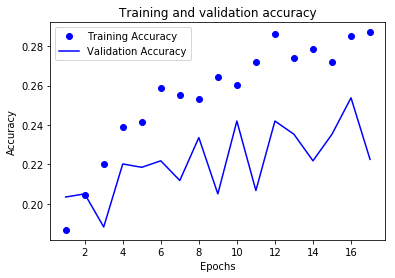

In [63]:
# Although my model crashed after about 24 hours I was still able to recover 17 epochs worth of information
# Thus I can plot the first 17 epochs to get an idea of how the model was performing

train_acc = [0.1867,0.2046,0.2204,0.2392,0.2413,0.2588,0.2554,0.2533,0.2642,0.2604,0.2721,0.2863,0.2738,0.2788,0.2721,0.2854,0.2871]
val_acc = [0.2034,0.2050,0.1882,0.2202,0.2185,0.2218,0.2118,0.2336,0.2050,0.2420,0.2067,0.2420,0.2353,0.2218,0.2353,0.2538,0.22252]
train_loss = [1.9408,1.9066,1.9020,1.8760,1.8715,1.8522,1.8340,1.8402,1.8237,1.8295,1.8177,1.8048,1.8110,1.7953,1.7934,1.7918,1.7905]
val_loss = [1.8786,1.9163,1.9516,1.9021,1.9813,1.8931,1.9369,1.8783,1.9680,2.0194,1.9327,2.0483,1.9139,1.9387,1.9646,1.9308,1.8998]

plt.plot(range(1,18), train_acc, 'bo', label = 'Training Accuracy')
plt.plot(range(1,18), val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



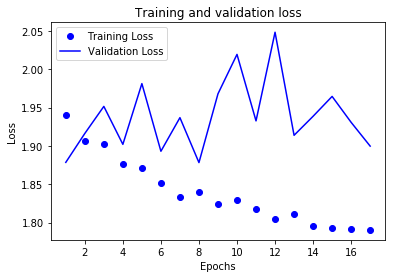

In [64]:

plt.plot(range(1,18), train_loss, 'bo', label = 'Training Loss')
plt.plot(range(1,18), val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Test accuracy
Calculate and report the test set accuracy.

In [ ]:
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(150, 150),
                 batch_size=20,
                 class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=30)
print('test acc:', test_acc)